# Tutorial 1: Data cleaning & visualization -(GS)

---

## Introduction

Welcome!, this tutorial will show you how to clean and visualise apple infrared data

First we import some libraries:

In [1]:
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Reading in data </i></b> 

The following code does the following:
- reads data from an Excel file
- converts the Excel file format into a Pandas dataframe 

In [2]:
df_GS = pd.read_excel('/users/hussein/source/apple_classification/data/Detect-GS.xlsx')

<b><i> Examining data </i></b> 

Let's takae a look at the GS apple data

In [3]:
df_GS.head(5)

,Sample,Condition,Age,Source,11995.49,11991.63,11987.78,11983.92,11980.06,11976.21,...,4034.497,4030.64,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.64,3999.783
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607
4,GS-ch-bruise1h-11a,B,1h,S1,-0.166998,-0.166739,-0.166921,-0.166882,-0.166638,-0.166418,...,0.520031,0.521815,0.520814,0.518175,0.518827,0.523526,0.529133,0.532134,0.531992,0.529879


In [4]:
df_GS.shape

(503, 2078)

---

<b><i> Cleaning data </i></b> 

First, let us change the column names, because wavelength values are more relatable than wavenumbers.

In [5]:
wavenumbers = np.float_(df_GS.columns[4:])
wavelengths = (1/wavenumbers)*10**7 # changing the wavenumber to a wave length
print("\nThis waveNum ("+str(wavenumbers[0])+") should change to this("+ str(wavelengths[0]) + ") waveLength\n")

df_GS.columns.values[4:] = np.round(wavelengths, 3) # getting just up to 3 decimal numbers
df_GS.head(4)


This waveNum (11995.49) should change to this(833.6466455309454) waveLength



,Sample,Condition,Age,Source,833.647,833.915,834.183,834.451,834.72,834.989,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607


now let us check the labels

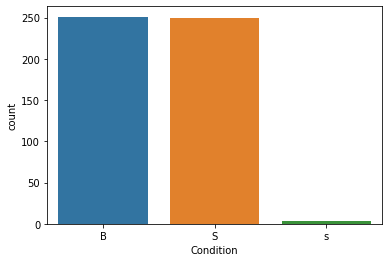

In [6]:
ax = sns.countplot(x="Condition",data=df_GS)

The graph shows that we have two clases of apples "good" -> 'S', and "bad" -> "B".

before we continue further, we need to make the "s" -> "S". (upper case), so that we only have two instead of three classes

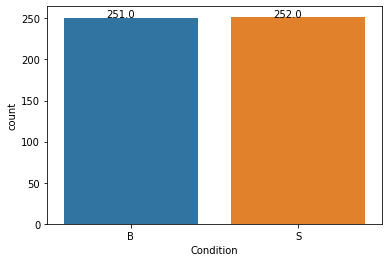

In [7]:
df_GS['Condition'] = df_GS['Condition'].str.upper()
ax = sns.countplot(x="Condition",data=df_GS)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Now we are done cleaning the data

---

<b><i> Getting the inputs and the outputs </i></b> 

In [8]:
# input
df_input_GS = df_GS.iloc[:, 4: ]
df_input_GS.head(3)

,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,-0.113074,-0.113266,-0.114108,-0.114498,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,-0.159698,-0.159639,-0.160184,-0.160504,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,-0.137664,-0.138295,-0.139098,-0.139391,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305


In [9]:
#output
y_GS = df_GS['Condition']

---

<b><i>  Visualising the data (before standardization)<b><i> 

In [10]:
n = 50
np.random.seed(0)
rand  = np.random.choice(len(y_GS), size= n)
rand # those are the indices to the apple samples that we will print

array([172,  47, 117, 192, 323, 251, 195, 359,   9, 211, 277, 242, 292,
        87,  70, 472,  88, 396, 314, 193, 486,  39,  87, 174,  88, 337,
       165,  25, 333,  72, 265, 404, 115, 464, 243, 197, 335, 431, 448,
       338,  99, 472, 177, 243, 285, 147, 147, 398, 423, 288])

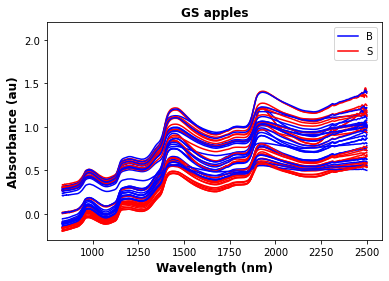

In [11]:
plt.figure(figsize=(6, 4))
S_Flag = True
B_Flag = True
for t in range (n):
    i = rand[t]
    lineSpec =  np.array(df_input_GS.iloc[i]).flatten()
    
    if y_GS[i] == 'S':
        if S_Flag:
            plt.plot(np.array(df_input_GS.columns), lineSpec, color = 'red', label = "S") # plotting the good apples
            S_Flag = False
        plt.plot(np.array(df_input_GS.columns), lineSpec, color = 'red') # plotting the good apples
    if y_GS[i] == 'B':
        if B_Flag == True:
            plt.plot(np.array(df_input_GS.columns), lineSpec, color = 'blue', label = "B") # plotting the good apples
            B_Flag = False
        plt.plot(np.array(df_input_GS.columns), lineSpec, color = 'blue') # plotting the bad apples
    
plt.title("GS apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Absorbance (au)", fontweight ='bold', fontsize =12)
plt.ylim([-.3,2.2])

plt.legend()

plt.show()

---

<b><i> Standard Scaler </i></b> 

In [12]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
input_scaled_GS = scaler.fit_transform(df_input_GS)

df_input_GS = pd.DataFrame(input_scaled_GS, columns = df_input_GS.columns)
# df_input_scaled['class'] = df['Condition']

df_input_GS

/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.808493,-0.807557,-0.808127,-0.809277,-0.810315,-0.809986,-0.808822,-0.810160,-0.814925,-0.817989,...,-0.408186,-0.390167,-0.395094,-0.416035,-0.416191,-0.393794,-0.376064,-0.394183,-0.438806,-0.461273
1,-1.045204,-1.042834,-1.040064,-1.039891,-1.041951,-1.041888,-1.039677,-1.039588,-1.042774,-1.045571,...,-1.982225,-1.971150,-1.966837,-1.972678,-1.980933,-1.986981,-1.992071,-1.999241,-2.010441,-2.015706
2,-0.933558,-0.930759,-0.930131,-0.930111,-0.930078,-0.929796,-0.930579,-0.933991,-0.938503,-0.941131,...,-0.543787,-0.546740,-0.556853,-0.563482,-0.553554,-0.538869,-0.526329,-0.530286,-0.579681,-0.641481
3,-0.956279,-0.954154,-0.953762,-0.953193,-0.951764,-0.951278,-0.952847,-0.956050,-0.959460,-0.960475,...,-1.022473,-1.018331,-1.003590,-0.988366,-0.989729,-1.006131,-1.027455,-1.034726,-1.020874,-0.996992
4,-1.071554,-1.068693,-1.068226,-1.068877,-1.070526,-1.072038,-1.072885,-1.074952,-1.078072,-1.079284,...,-1.637289,-1.630079,-1.636046,-1.644734,-1.633950,-1.608915,-1.587258,-1.577930,-1.585577,-1.603032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-0.275430,-0.274320,-0.274200,-0.274479,-0.274608,-0.277242,-0.281107,-0.280976,-0.276278,-0.272611,...,-0.491406,-0.485925,-0.464286,-0.467758,-0.490807,-0.515450,-0.524820,-0.519023,-0.512824,-0.488398
499,-0.298707,-0.295062,-0.294296,-0.294798,-0.296765,-0.301067,-0.302066,-0.298652,-0.296644,-0.297677,...,-1.157046,-1.173071,-1.175726,-1.162370,-1.142283,-1.133218,-1.141321,-1.142113,-1.121310,-1.100813
500,-0.514468,-0.516540,-0.518424,-0.519333,-0.522529,-0.528154,-0.530454,-0.526756,-0.521762,-0.520717,...,-2.076827,-2.073034,-2.058804,-2.051791,-2.053137,-2.047367,-2.043846,-2.051221,-2.057879,-2.057166
501,0.014295,0.014717,0.016864,0.017340,0.015010,0.011359,0.009173,0.008830,0.009937,0.013005,...,1.524477,1.566631,1.663975,1.720487,1.749993,1.765076,1.669538,1.535575,1.491738,1.417050


---

<b><i> Data visualisation (after standardization) </i></b > 

we will use the same 50 random samples

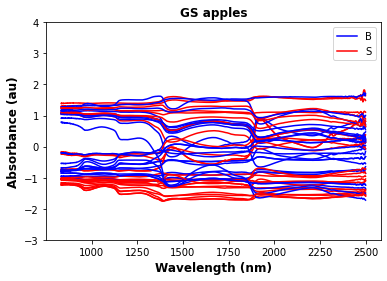

In [13]:
plt.figure(figsize=(6, 4))
plt.title("")
S_Flag = True
B_Flag = True
for t in range (n):
    i = rand[t]
    lineSpec =  np.array(df_input_GS.iloc[i]).flatten()
    
    if y_GS[i] == 'S':
        if S_Flag:
            plt.plot(np.array(df_input_GS.columns), lineSpec, color = 'red', label = "S") # plotting the good apples
            S_Flag = False
        plt.plot(np.array(df_input_GS.columns), lineSpec, color = 'red') # plotting the good apples
    if y_GS[i] == 'B':
        if B_Flag == True:
            plt.plot(np.array(df_input_GS.columns), lineSpec, color = 'blue', label = "B") # plotting the good apples
            B_Flag = False
        plt.plot(np.array(df_input_GS.columns), lineSpec, color = 'blue') # plotting the bad apples
    
plt.title("GS apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Absorbance (au)", fontweight ='bold', fontsize =12)
plt.ylim([-3,4])
plt.legend()

plt.show()

Done

---

<b><i> store the data <b><i>

In [26]:
%store  df_input_GS
%store  y_GS
%store  df_GS

Stored 'df_input_GS' (DataFrame)
Stored 'y_GS' (Series)
Stored 'df_GS' (DataFrame)
